In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as pl
import ipywidgets as iw

In [2]:
def Kugel ():
    u = np.linspace (0, np.pi, 12)
    v = np.linspace (0, 2 * np.pi, 24)
    uu, vv = np.meshgrid (u, v)
    xx = np.sin (uu) * np.cos (vv) 
    yy = np.sin (uu) * np.sin (vv)
    zz = np.cos (uu)
    return np.stack ((xx, yy, zz), axis = 0)

In [3]:
P0 = Kugel()
print (P0.shape)

(3, 24, 12)


In [4]:
def Plot (m, n, k, P):
    ax = pl.subplot (m, n, k, projection = '3d')
    ax.plot_surface (P [0], P [1], P [2],
        shade = False, rstride = 1, cstride = 1, color = 'white', edgecolor = 'blue', linewidth = 0.2)
    ax.set_box_aspect ((np.ptp (P [0]), np.ptp (P [1]), np.ptp (P [2])))
    return ax

<Axes3D: >

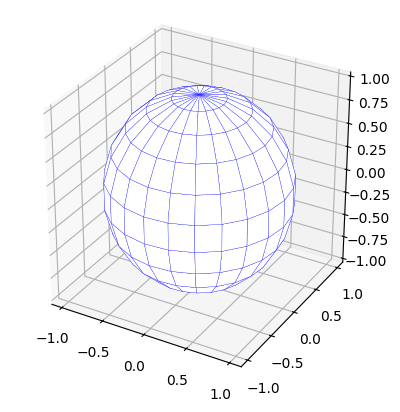

In [5]:
Plot (1, 1, 1, P0)

In [7]:
A = np.array ([
    [1,  2, 3],
    [2, -3, 5],
    [2, -3, 5]
]) .T

In [8]:
def Mult (A, P):
    dim, m, n = P.shape
    p = P.reshape ((dim, m * n))
    q = A @ p
    return q.reshape ((dim, m, n))

In [9]:
Q = Mult (A, P0)
print (Q.shape)

(3, 24, 12)


<Axes3D: >

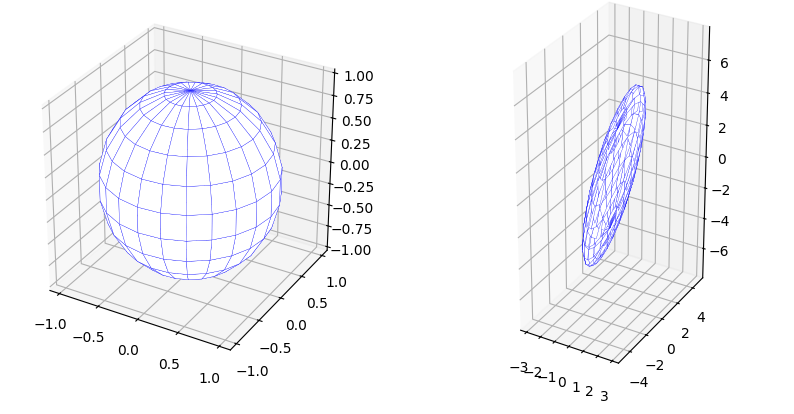

In [10]:
pl.figure (figsize = (10, 5))
Plot (1, 2, 1, P0)
Plot (1, 2, 2, Q)

In [11]:
U, D, VT = la.svd (A)
Sigma = np.diag (D)
print (U.shape)
print (Sigma.shape)
print (VT.shape)
print (D)

(3, 3)
(3, 3)
(3, 3)
[8.92660576e+00 3.21180784e+00 9.89592823e-17]


In [12]:
P1 = Mult (VT, P0)

In [13]:
P2 = Mult (Sigma, P1)

In [14]:
P3 = Mult (U, P2)

In [15]:
def Callback (azi, ele):
    pl.figure (figsize = (7, 7))
    ax = Plot (2, 2, 1, P0); ax.view_init (elev = ele, azim = azi)
    ax = Plot (2, 2, 2, P1); ax.view_init (elev = ele, azim = azi)
    ax = Plot (2, 2, 3, P2); ax.view_init (elev = ele, azim = azi)
    ax = Plot (2, 2, 4, P3); ax.view_init (elev = ele, azim = azi)

In [16]:
SliderAzim = iw.IntSlider (min = -180, max = 180, step = 1, value = 30, description = 'Azimut')
SliderElev = iw.IntSlider (min = -90, max = 90, step = 1, value = 30, description = 'Elevation')
UserInterface = iw.HBox ([SliderAzim, SliderElev])
Output = iw.interactive_output (Callback, {'azi': SliderAzim, 'ele': SliderElev})
display (UserInterface, Output)

Output()